In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from process_results.results_utils import DATASETS, DEFAULT_METRIC, to_dataframe, make_plots, read_log

def plot_heatmap(df):
    df["score_str"] =  df.best_metric.map(lambda x: f"{x*100:.1f}\n") + df.last3_mean.map(lambda x: f"{x*100:.1f}") + df.last3_std.map(lambda x: f" ± {x*100:.1f}")
    sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")
    plt.show()

def logfile_paths(dataset):
    return glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True)

# for dataset in DATASETS:
#     for logfile in logfile_paths(dataset):
#         df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
#         plot_heatmap(df)

/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# for dataset in DATASETS:
#     score = to_dataframe(logfile_paths(dataset)[0], metric=DEFAULT_METRIC[dataset])["best_metric"].max()
#     print(f"{dataset}: {score}")

QNLI
0.9125022888183594 ../../checkpoints/finetune/bert_base/QNLI/log


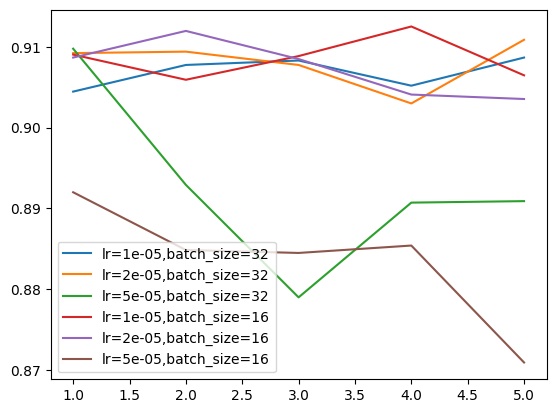

RTE
0.7111913561820984 ../../checkpoints/finetune/bert_base/RTE/log


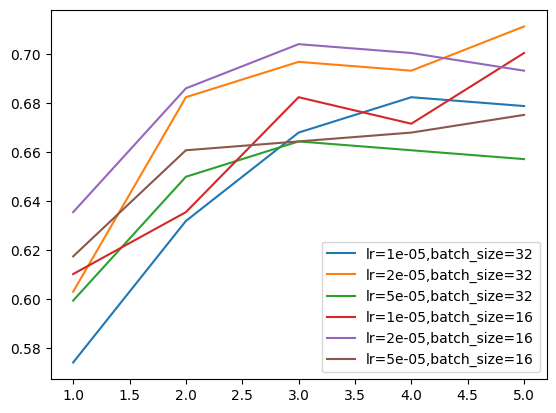

0.6967509025270758 ../../checkpoints/finetune/bert_base/RTE/log_rp_2023-04-26_00:40:39


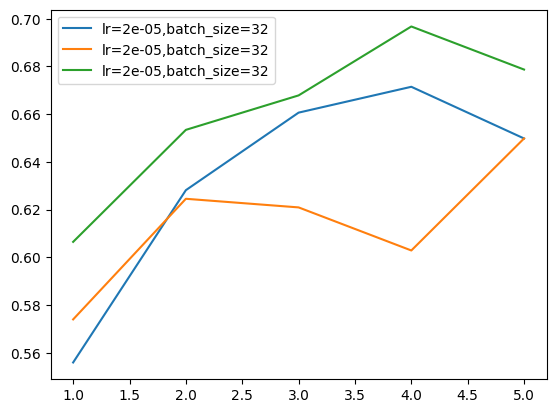

0.6714801444043321 ../../checkpoints/finetune/bert_base/RTE/log_rp_2023-04-25_22:14:28


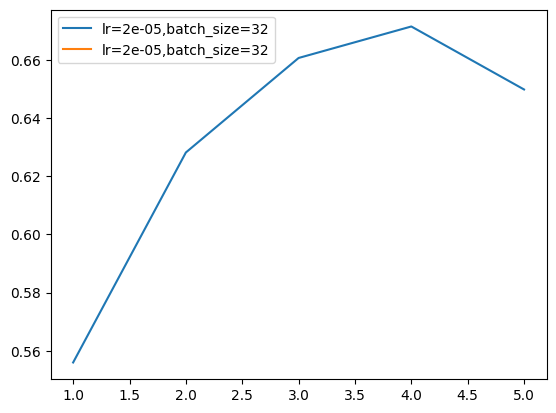

SST-2
0.9311926605504587 ../../checkpoints/finetune/bert_base/SST-2/log_rp_2023-04-26_00:40:53


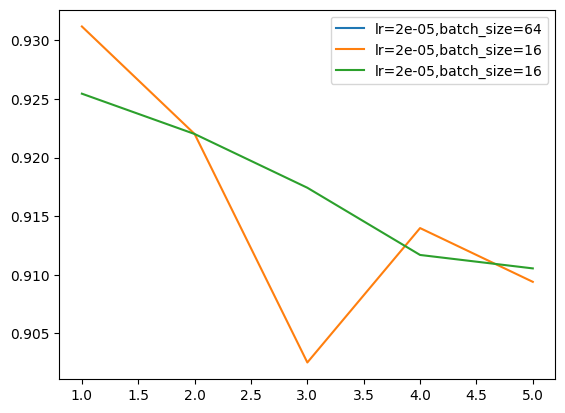

0.9254587155963303 ../../checkpoints/finetune/bert_base/SST-2/log_rp_2023-04-26_00:38:18


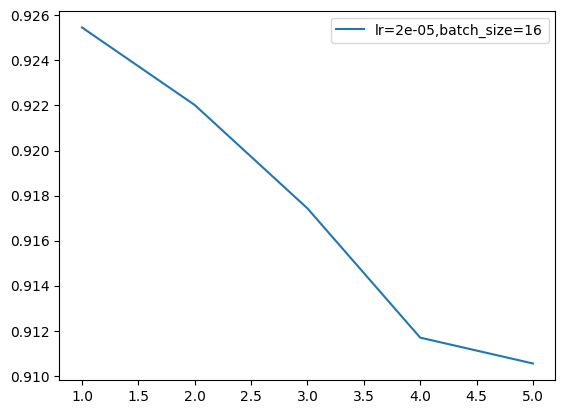

0.9277522935779816 ../../checkpoints/finetune/bert_base/SST-2/log_rp_2023-04-25_22:29:17


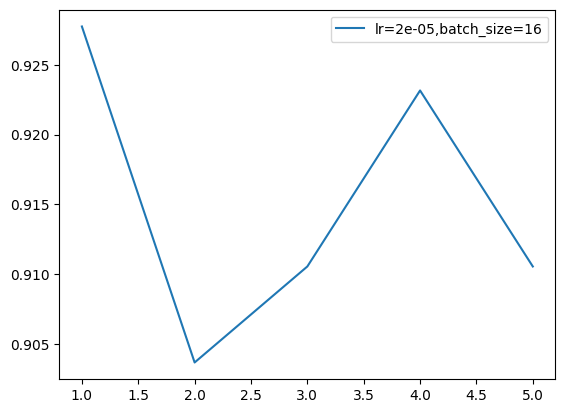

0.9346330275229358 ../../checkpoints/finetune/bert_base/SST-2/log


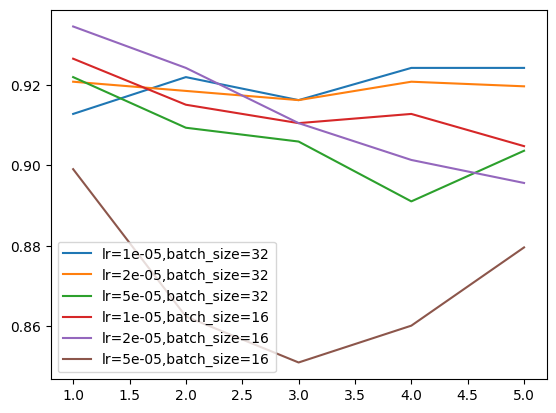

MRPC
0.8877805471420288 ../../checkpoints/finetune/bert_base/MRPC/log_rp_2023-04-25_21:05:37


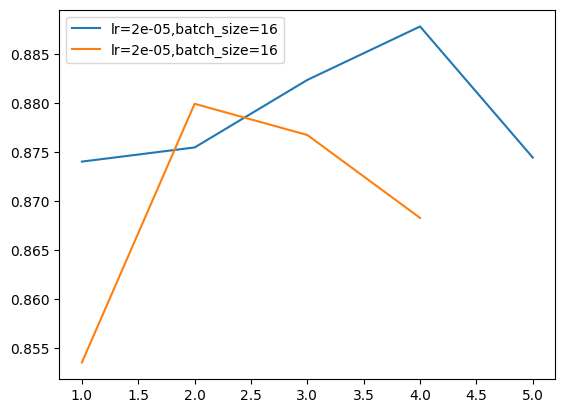

0.8853135704994202 ../../checkpoints/finetune/bert_base/MRPC/log


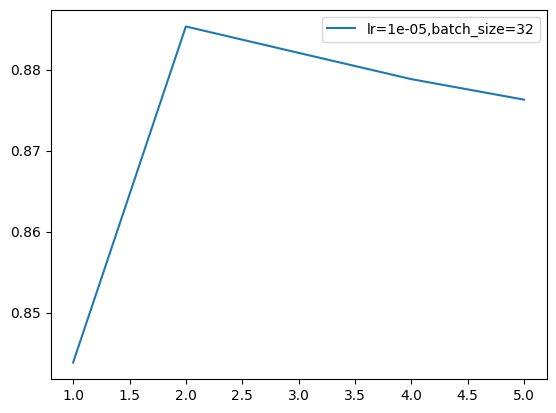

0.8902589082717896 ../../checkpoints/finetune/bert_base/MRPC/log_hp_2023-04-25_21:05:37


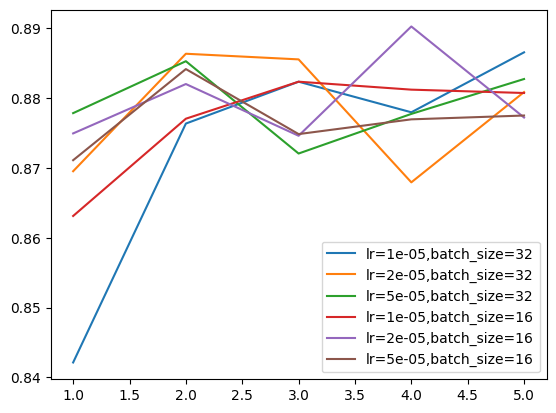

0.8798967003822327 ../../checkpoints/finetune/bert_base/MRPC/log_rp_2023-04-25_22:21:47


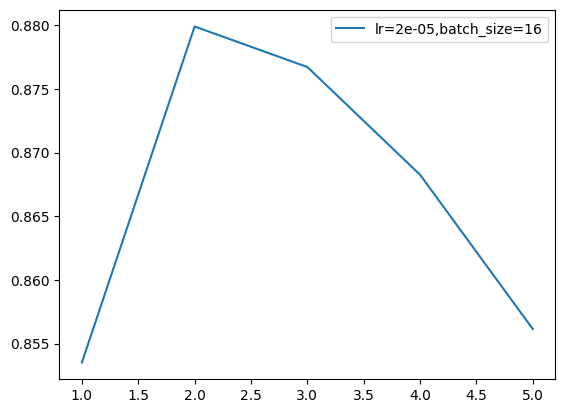

0.8877805471420288 ../../checkpoints/finetune/bert_base/MRPC/log_rp_2023-04-25_22:29:31


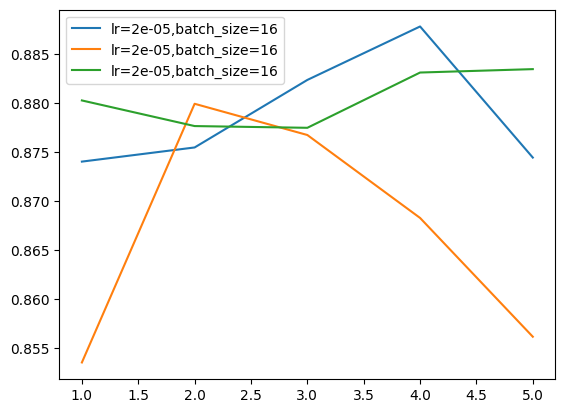

MNLI
0.8472746014595032 ../../checkpoints/finetune/bert_base/MNLI/log


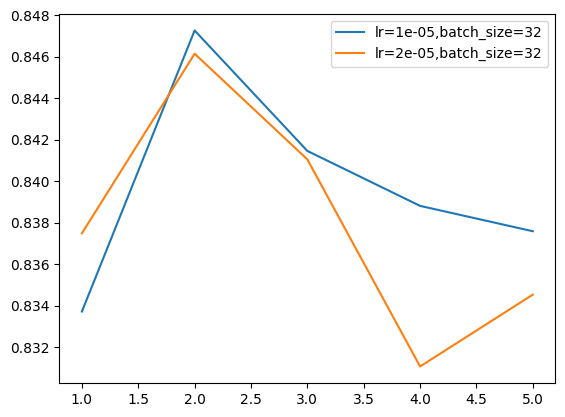

0.8472745797249108 ../../checkpoints/finetune/bert_base/MNLI/log_rp_2023-04-25_21:25:22


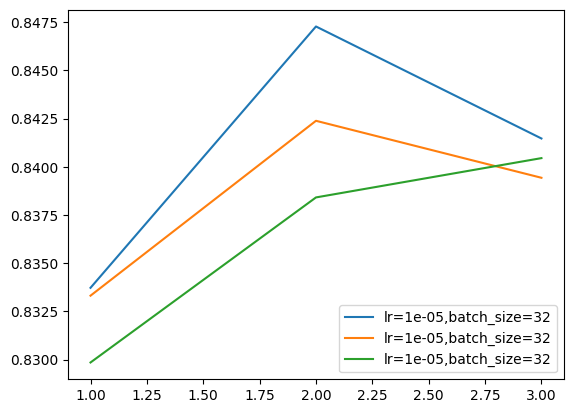

0.8424859908303617 ../../checkpoints/finetune/bert_base/MNLI/log_hp_2023-04-25_21:25:22


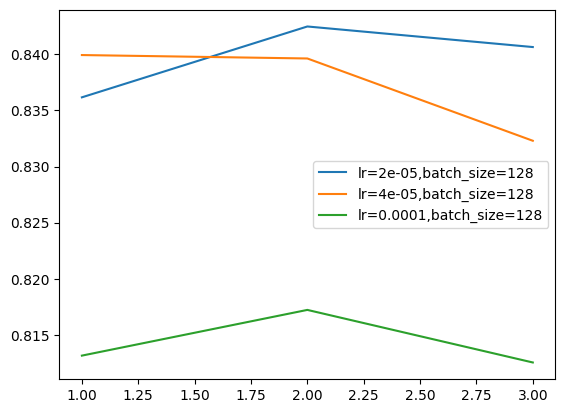

QQP
0.9093989729881287 ../../checkpoints/finetune/bert_base/QQP/log


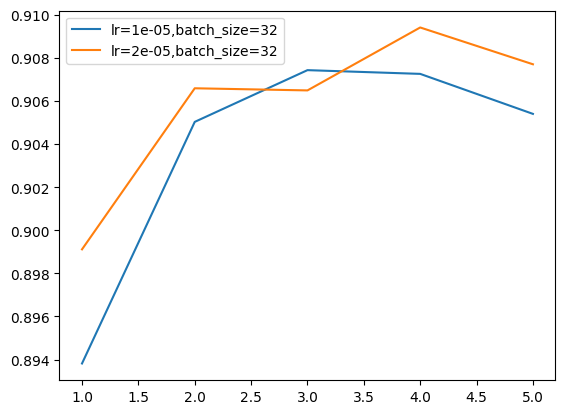

CoLA
0.5547002553939819 ../../checkpoints/finetune/bert_base/CoLA/log_rp_2023-04-25_22:29:39


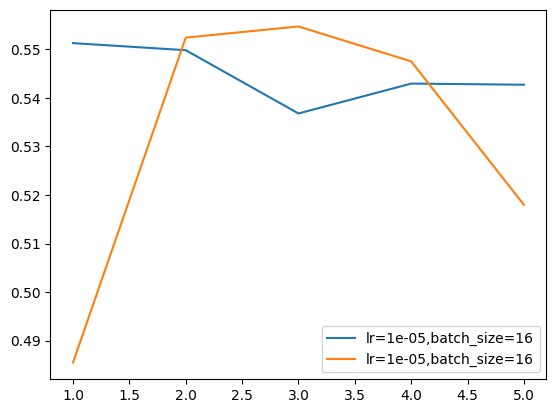

0.5831040143966675 ../../checkpoints/finetune/bert_base/CoLA/log_rp_2023-04-25_22:20:46


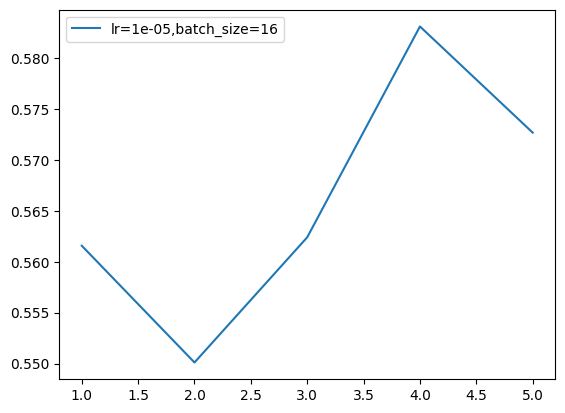

0.5942589044570923 ../../checkpoints/finetune/bert_base/CoLA/log


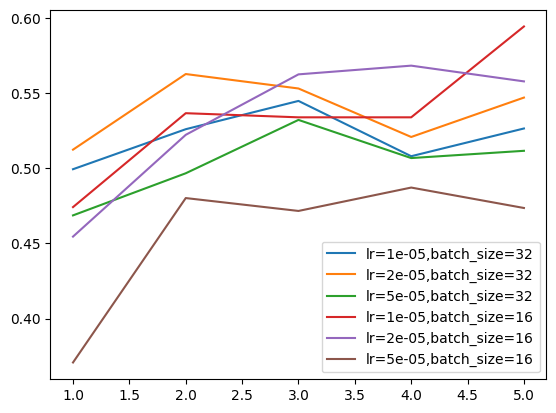

0.5831040143966675 ../../checkpoints/finetune/bert_base/CoLA/log_rp_2023-04-26_00:38:35


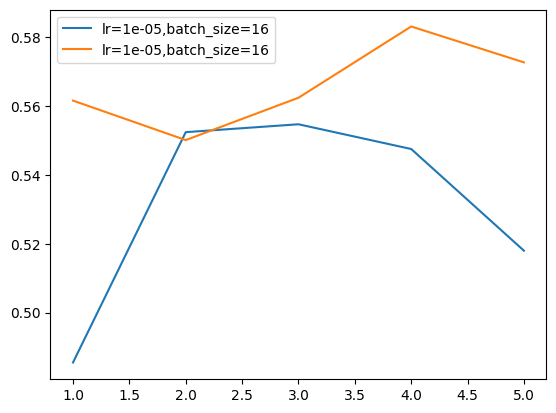

0.5831040143966675 ../../checkpoints/finetune/bert_base/CoLA/log_rp_2023-04-26_00:40:45


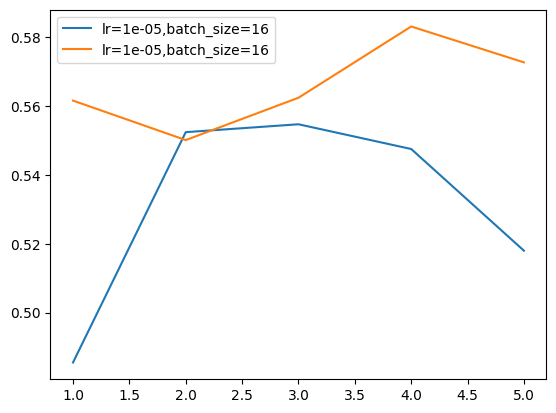

0.5512695908546448 ../../checkpoints/finetune/bert_base/CoLA/log_rp_2023-04-25_22:21:33


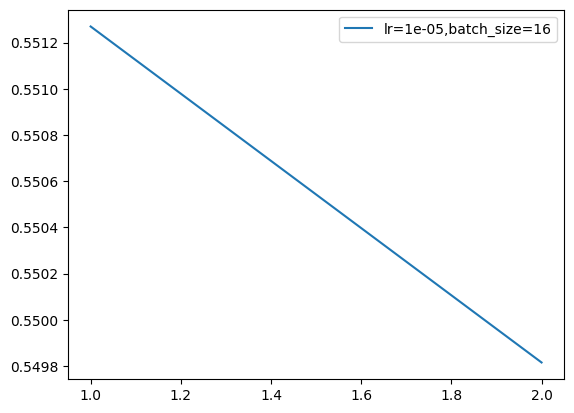

In [5]:
for dataset in DATASETS:
    print(dataset)
    for logfile in glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/log*"):
        df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
        if "best_metric" in df:
            print(df["best_metric"].max(),logfile)
            make_plots(logfile, metric=DEFAULT_METRIC[dataset])

In [17]:
dataset = "RTE"
training_runs_hp = read_log(f"../../checkpoints/finetune/bert_base/{dataset}/log")
training_runs_rp = read_log(f"../../checkpoints/finetune/bert_base/{dataset}/log_rp_2023-04-26_00:40:39")

for run in training_runs_hp:
    if run.args["lr"]==training_runs_rp[0].args["lr"] and run.args["batch_size"]==training_runs_rp[0].args["batch_size"]:
        training_runs_rp.append(run)

[]

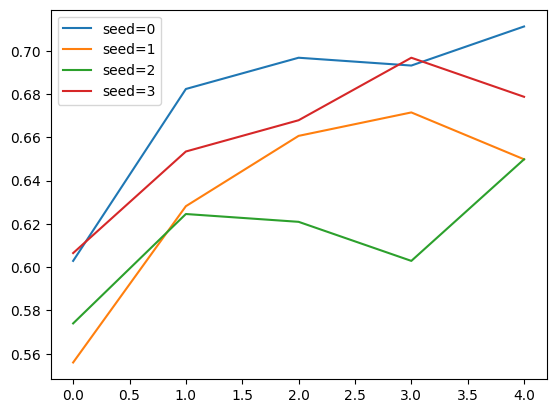

In [26]:
for run in sorted(training_runs_rp,key=lambda run:run.args["seed"]):
    scores = []
    for eval_res in run.epoch_evals:
        if "dev_metrics" in eval_res:
            score = eval_res["dev_metrics"][DEFAULT_METRIC[dataset]]
        else:
            assert DEFAULT_METRIC[dataset] == "accuracy"
            score = eval_res["dev_accuracy"]
        scores.append(score)
    plt.plot(scores,label=f"seed={run.args['seed']}")
plt.legend()
plt.plot()